# **Title of Project**

**Chance of Admission for Higher Studies Prediction**

# **Objective**


To apply for a master's degree is a very expensive and intensive work. With the help of this predictive model, students will be able to accurately estimate their chances of Admission in their Master's Degree. So, basically this set is about the Graduate Admissions data i.e. given a set of standardized scores like GRE, TOEFL, SOP, LOR etc.

# **Data Source**

**YBI Foundation GitHub Page**

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Data**

In [2]:
admission=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

# **Describe Data**

Predicting the chances of admission of a student to a Graduate program based on:

1. GRE Scores (290 to 340)

2. TOEFL Scores (92 to 120)

3. University Rating (1 to 5)

4. Statement of Purpose (1 to 5)

5. Letter of Recommendation Strength (1 to 5)

6. Undergraduate CGPA (6.8 to 9.92)

7. Research Experience (0 or 1)

8. Chance of Admit (0.34 to 0.97)

In [3]:
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.nunique()

Serial No            400
GRE Score             49
TOEFL Score           29
University Rating      5
 SOP                   9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

# **Data Visualization**

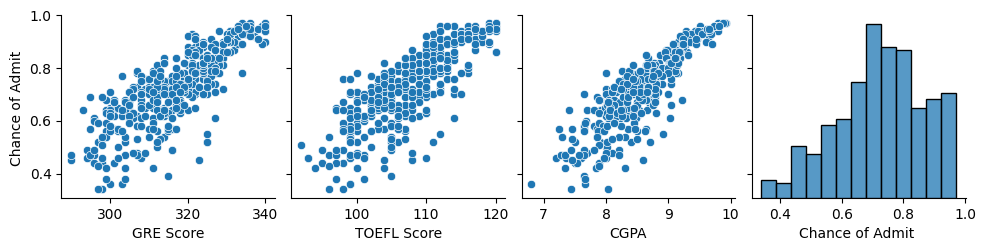

In [5]:
sns.pairplot(admission,x_vars=['GRE Score','TOEFL Score', 'CGPA','Chance of Admit '],y_vars=['Chance of Admit '])

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

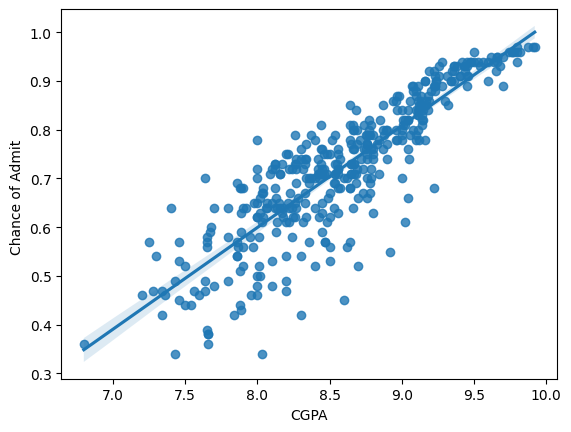

In [6]:
sns.regplot(x='CGPA', y='Chance of Admit ', data=admission)

# **Data Preprocessing**

In [7]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
admission.isnull().any()

Serial No            False
GRE Score            False
TOEFL Score          False
University Rating    False
 SOP                 False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

# **Define Target Variable (Y) and Feature Variables (X)**

In [10]:
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
Y= admission['Chance of Admit ']

In [12]:
Y.shape

(400,)

In [13]:
X= admission.drop(['Serial No','Chance of Admit '],axis=1)

In [14]:
X.shape

(400, 7)

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


# **Scaling Data**

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()

In [18]:
X = ss.fit_transform(X)

In [19]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [20]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.174439e-16,5.595524e-16,7.105427e-17,7.993606e-17,-1.332268e-16,7.771561e-16,-3.996803e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-1.099975e+00
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-1.099975e+00
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,9.091117e-01
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,9.091117e-01
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,9.091117e-01


# **Train Test Split Data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size =0.7,random_state=2529)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((280, 7), (120, 7), (280,), (120,))

# **Model Selection**

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model= LinearRegression()


# **Model Evaluation**

In [26]:
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
model.intercept_

0.7287978554892981

In [28]:
model.coef_

array([ 0.02338345,  0.01741428,  0.00647553, -0.00382693,  0.01770636,
        0.0673856 ,  0.01026114])

# **Predict Test Data**

In [29]:
Y_pred = model.predict(X_test)

In [30]:
Y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

# **Model Accuracy**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error, r2_score

In [32]:
mean_absolute_error(Y_test,Y_pred)

0.044001289342326534

In [33]:
mean_absolute_percentage_error(Y_test,Y_pred)

0.07575278864605443

In [34]:
mean_squared_error(Y_test,Y_pred)

0.004038263715495686

In [35]:
r2_score(Y_test,Y_pred)

0.8066078856630297

# **Explaination**

**"Chances of Admission for Higher Studies" - Machine Learning (ML) project involves developing a model that can accurately predict the chances of admission of students in their Master's Degree based on certain input features.**

Here's an explanation of the key steps and components involved in such a project:

**Data Collection and Preprocessing:**

Gather a dataset that contains information about various colleges and universities. The dataset should include features like GRE Scores, TOEFL Scores, University Rating, Statement of Purpose, Letter of Recommendation Strength, Undergraduate CGPA, Research Experience. Clean and preprocess the data to handle missing values, outliers, and categorical variables.

**Feature Selection/Engineering:**

Identify the most relevant features that could contribute to predicting the chances of Admission accurately. You might need to transform or engineer features to make them more suitable for modeling.

**Data Splitting:**

Split the dataset into training and testing subsets. The training subset will be used to train the model, while the testing subset will be used to evaluate its performance on unseen data.

**Model Selection:**

Choose an appropriate regression algorithm for your Admission prediction task. Linear Regression is a common choice for such problems, but you can also explore other algorithms like Random Forest Regression, Gradient Boosting, or Neural Networks.

**Model Training:**

Train the selected model using the training data. During training, the model learns the relationship between the input features and the target (Chances of Admission) by adjusting its internal parameters.

**Model Evaluation:**

Use the testing data to evaluate the model's performance. Common evaluation metrics for regression tasks include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) score. These metrics help you understand how well the model's predictions match the actual Chances of Admission values.

**Hyperparameter Tuning (Optional):**

If applicable, tune the hyperparameters of the chosen algorithm to optimize the model's performance. Hyperparameters control aspects of the algorithm's behavior, such as regularization strength in Linear Regression or the number of trees in a Random Forest.

**Prediction and Deployment (Optional):**

Once you're satisfied with the model's performance, you can deploy it for making real-world predictions. Users could input college specifications, and the model would provide an estimated value for Chances of Admission.

**Iterative Refinement:**

If your model's performance is not satisfactory, you can revisit earlier steps to improve it. This might involve collecting more data, experimenting with different features, trying different algorithms, or fine-tuning hyperparameters.

**Communication:**

Finally, communicate your results and findings. This could involve creating visualizations to show how well the model's predictions align with the actual Chances of Admission. Explain the model's strengths, weaknesses, and potential applications.

**"Chances of Admission for Higher Studies" - ML project demonstrates how machine learning can be applied to real-world problems in the education industry domain, providing insights into the factors that affect students, while getting admission in their Graduate program.**